<a href="https://colab.research.google.com/github/matveisut/ForAI/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

data  = pd.read_csv('https://raw.githubusercontent.com/matveisut/ForAI/refs/heads/main/weather_classification_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [22]:
data.describe()


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [23]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [24]:
data.Location.value_counts()

,count
Location,
inland,4816
mountain,4813
coastal,3571


In [25]:
data.Season.value_counts()

,count
Season,
Winter,5610
Spring,2598
Autumn,2500
Summer,2492


In [26]:
data['Cloud Cover'].value_counts()

,count
Cloud Cover,
overcast,6090
partly cloudy,4560
clear,2139
cloudy,411


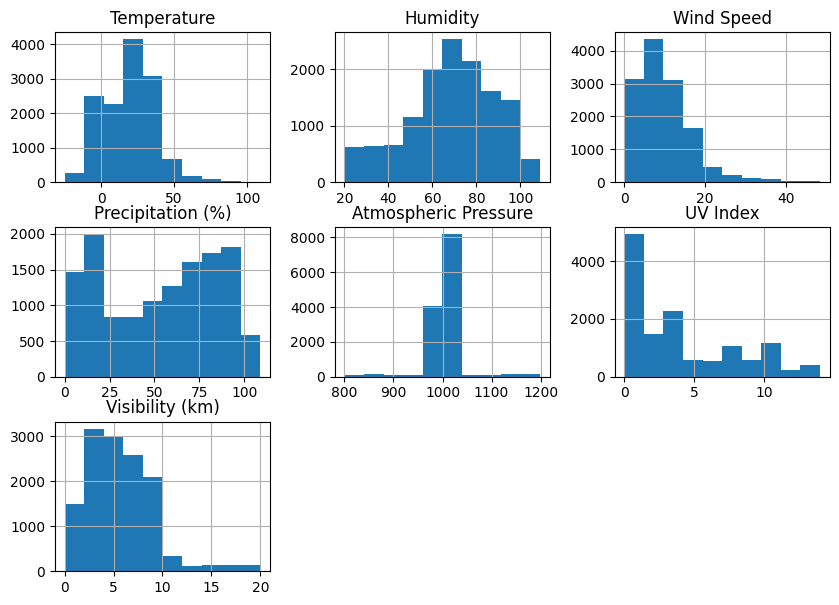

In [27]:
data.hist(bins=10, figsize=(10, 7))
y = data['Weather Type']
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(y) #чтобы потом вывести конректно какие классы к каким цифрам относятся

In [28]:
y.value_counts()# значит классы сбалансированны

,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


In [29]:
category_mapping = {'Winter': 1, 'Spring': 2, 'Summer': 3,'Autumn': 4}

data['Season'] = data['Season'].map(category_mapping).astype(int)



In [30]:
data = data.select_dtypes(include=[float, int])

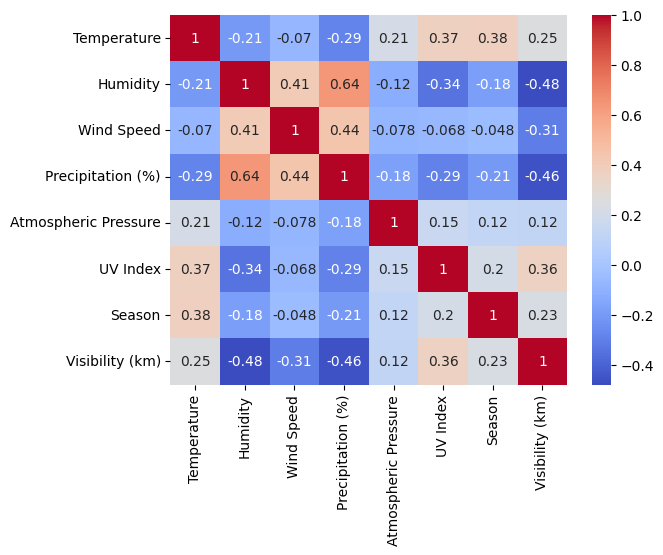

In [31]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
data = data.drop(['Visibility (km)','Precipitation (%)'], axis = 1) #убрали т. к. большие корелляции


In [32]:
X = data
print(X)
print(y)

       Temperature  Humidity  Wind Speed  Atmospheric Pressure  UV Index  \
0             14.0        73         9.5               1010.82         2   
1             39.0        96         8.5               1011.43         7   
2             30.0        64         7.0               1018.72         5   
3             38.0        83         1.5               1026.25         7   
4             27.0        74        17.0                990.67         1   
...            ...       ...         ...                   ...       ...   
13195         10.0        74        14.5               1003.15         1   
13196         -1.0        76         3.5               1067.23         1   
13197         30.0        77         5.5               1012.69         3   
13198          3.0        76        10.0                984.27         0   
13199         -5.0        38         0.0               1015.37         5   

       Season  
0           1  
1           2  
2           2  
3           2  
4      

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
def all_metrics(y_test, y_pred, clf_name):
  print('Метрики для', clf_name)

  print('precision ', metrics.precision_score(y_test, y_pred, average = 'macro'))
  print('recall' ,metrics.recall_score(y_test, y_pred, average = 'macro'))
  print('f-мера',metrics.f1_score(y_test, y_pred, average = 'macro'))


  # Получаем матрицу ошибок (confusion matrix)
  cm = confusion_matrix(y_test, y_pred)

  # Печатаем матрицу
  print("Confusion Matrix:")
  print(cm)

  for i in range(len(cm)):
      TP = cm[i, i]  # Истинные положительные
      FP = cm[:, i].sum() - TP  # Ложные положительные
      FN = cm[i, :].sum() - TP  # Ложные отрицательные
      TN = cm.sum() - (TP + FP + FN)  # Истинные отрицательные

      decoded_class = label_encoder.inverse_transform([i])
      print(f"\nКласс {decoded_class}:")
      print(f"TP: {TP}")
      print(f"FP: {FP}")
      print(f"FN: {FN}")
      print(f"TN: {TN}")

In [35]:
#Обучаем модель KNN с подбором параметров через gridSearchCV
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': range(15,22), 'leaf_size':range(2,5)}

grid_search_cv_clf = GridSearchCV(KNeighborsClassifier(), parameters, cv=4)

grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, 'cross value score =', cross_val_score(model,X_test,y_test,cv=4).mean())

y_pred = model.predict(X_test)



{'leaf_size': 2, 'n_neighbors': 15} cross value score = 0.8181818181818182


In [36]:
all_metrics(y_test, y_pred, 'knn')

Метрики для knn
precision  0.835862033337818
recall 0.8328612196844934
f-мера 0.8334854391602547
Confusion Matrix:
[[879 143  15  59]
 [234 825  21  42]
 [ 38  22 977  34]
 [ 62  48  16 941]]

Класс ['Cloudy']:
TP: 879
FP: 334
FN: 217
TN: 2926

Класс ['Rainy']:
TP: 825
FP: 213
FN: 297
TN: 3021

Класс ['Snowy']:
TP: 977
FP: 52
FN: 94
TN: 3233

Класс ['Sunny']:
TP: 941
FP: 135
FN: 126
TN: 3154


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

df_scaled = pd.DataFrame(scaler.transform(data), columns=data.columns)
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size = 0.33)

#Обучаем модель Logistic Regression с подбором параметров через gridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = [{'penalty':['l2']}, #l1 l2
              {'C':[500, 1000]},
              {'solver' : ['lbfgs']}, # этот алгоритм оптимиазции лучше подходят для многоклассовой классификации
              {'max_iter' : [100]}]
grid_search_cv_clf = GridSearchCV(LogisticRegression(), parameters, cv=4)

grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, 'cross value score =', cross_val_score(model,X_test,y_test,cv=4).mean())

y_pred = model.predict(X_test)


{'penalty': 'l2'} cross value score = 0.7637741046831955


In [38]:
all_metrics(y_test, y_pred, 'логистическая регрессия')

Метрики для логистическая регрессия
precision  0.7705585133911932
recall 0.7729480293186883
f-мера 0.7714367400445372
Confusion Matrix:
[[ 687  246   38   88]
 [ 191  757   68   70]
 [  21    5 1011   66]
 [  99   56   34  919]]

Класс ['Cloudy']:
TP: 687
FP: 311
FN: 372
TN: 2986

Класс ['Rainy']:
TP: 757
FP: 307
FN: 329
TN: 2963

Класс ['Snowy']:
TP: 1011
FP: 140
FN: 92
TN: 3113

Класс ['Sunny']:
TP: 919
FP: 224
FN: 189
TN: 3024


In [39]:
#Обучаем модель tree с подбором параметров через gridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_cv_clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=4)

grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, 'cross value score =', cross_val_score(model,X_test,y_test,cv=4).mean())

y_pred = model.predict(X_test)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5} cross value score = 0.8464187327823691


In [40]:
all_metrics(y_test, y_pred, 'дерево')

Метрики для дерево
precision  0.856646526893001
recall 0.8500334227859875
f-мера 0.8498586969456166
Confusion Matrix:
[[929  51  21  58]
 [256 783  16  31]
 [ 34  33 993  43]
 [ 54  40  15 999]]

Класс ['Cloudy']:
TP: 929
FP: 344
FN: 130
TN: 2953

Класс ['Rainy']:
TP: 783
FP: 124
FN: 303
TN: 3146

Класс ['Snowy']:
TP: 993
FP: 52
FN: 110
TN: 3201

Класс ['Sunny']:
TP: 999
FP: 132
FN: 109
TN: 3116


In [41]:
#Обучаем модель tree с подбором параметров через gridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
    'n_estimators': [100], #100 200
    'max_depth': [10], # 5 10 20
    'min_samples_split': [5], #2, 5, 10
    'min_samples_leaf': [2], #1, 2
    'max_features': ['sqrt']  #auto sqrt
}

grid_search_cv_clf = GridSearchCV(RandomForestClassifier(), parameters, cv=4)

grid_search_cv_clf.fit(X_train,y_train)

model = grid_search_cv_clf.best_estimator_
print(grid_search_cv_clf.best_params_, 'cross value score =', cross_val_score(model,X_test,y_test,cv=4).mean())

y_pred = model.predict(X_test)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100} cross value score = 0.8503213957759412


In [42]:
all_metrics(y_test, y_pred, 'рандомный лес')

Метрики для рандомный лес
precision  0.853885500752313
recall 0.8477706847713835
f-мера 0.8477928500734575
Confusion Matrix:
[[926  62  22  49]
 [250 788   9  39]
 [ 41  32 995  35]
 [ 55  46  22 985]]

Класс ['Cloudy']:
TP: 926
FP: 346
FN: 133
TN: 2951

Класс ['Rainy']:
TP: 788
FP: 140
FN: 298
TN: 3130

Класс ['Snowy']:
TP: 995
FP: 53
FN: 108
TN: 3200

Класс ['Sunny']:
TP: 985
FP: 123
FN: 123
TN: 3125


ИТОГО:

***Метрики для рандомого леса***

  precision 0.8655838725064371

  recall 0.8630978006487051

  f-мера 0.8623359197325897

***Метрики для дерева решений***

precision  0.8673495618819819

recall 0.8632567228771851

f-мера 0.8622775677360902

***Метрики для логистическая регрессия***

precision  0.786097790189692

recall 0.7892650053486028

f-мера 0.7871892693439537

***Метрики для knn***

precision  0.850418692475519

recall 0.8476973476029573

f-мера 0.8480053419596456




